# Exercises XP Gold
Last Updated: March 26th, 2024

## What will you create
By the end of this exercise, you’ll have written your own K-means clustering function in Python, capable of segmenting a dataset into distinct groups.

You will create scatter plots to visualize the distribution of data points across clusters and the convergence of centroids.

Through your implementation, you’ll generate a report indicating the cluster assignment for each data point in the dataset.

You will also create a function to randomly initialize centroids, which is a crucial part of the K-means algorithm.

By running your K-means implementation with different initializations, you will learn how to evaluate and refine clustering results.



## What will you learn
* Gain a deep understanding of the K-means clustering algorithm by implementing it from scratch.

* Learn how to use Euclidean distance to assess the similarity between data points and centroids.

* Understand the impact of initial centroid selection on the clustering outcome and learn methods to initialize centroids.

* *iscover how the K-means algorithm iteratively refines the positions of centroids to minimize within-cluster variances.

* Develop skills to visualize and interpret the resulting clusters and centroids from the K-means algorithm.





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Étape 1 : Chargement et visualisation des données

In [2]:
# Charger le dataset depuis le fichier .mat
data = loadmat('ex7data2.mat')
X = data['X']  # X est un tableau (m, 2)

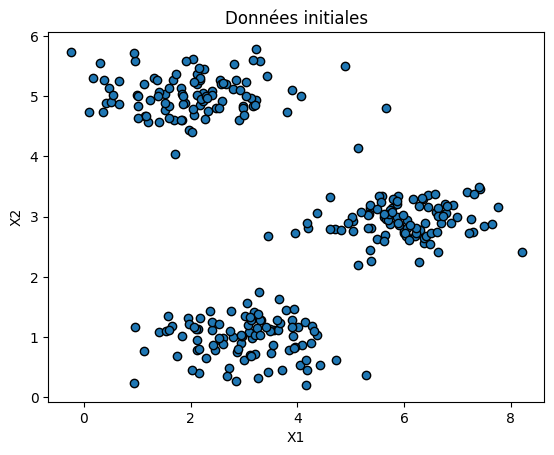

In [3]:

# Affichage des points de données
plt.scatter(X[:, 0], X[:, 1], marker='o', edgecolors='k')
plt.title("Données initiales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### **Graphique affiché : "Données initiales"**

* Il montre la **distribution brute** des données sans clustering appliqué.

---

### **Observation visuelle**

* **Trois regroupements clairs** :

  * En haut à gauche (\~\[2,5])
  * En bas à gauche (\~\[3,1])
  * À droite (\~\[6,3])

* **Répartition dense**, bien séparée.

* Quelques **points isolés** (outliers), mais pas significatifs.

---

### **Conclusion**

* Données **parfaites pour du K-means**.
* Un bon choix de `K = 3` est **visuellement justifié**.
* K-means devrait converger rapidement et proprement, comme tu l’as vu.


## Étape 2 : Trouver les centroïdes les plus proches

In [4]:
def find_closest_centroids(X, centroids):
    """
    Assigne chaque point de X au centroïde le plus proche
    """
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        # Calcul de la distance euclidienne à chaque centroïde
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)  # Index du centroïde le plus proche

    return idx

In [5]:
# Test avec des centroïdes initiaux
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
print("Indices des 3 premiers points assignés :", idx[:3])

Indices des 3 premiers points assignés : [0 2 1]


### Cela signifie que :

* Le **1er point** a été assigné au **cluster 0**
* Le **2e point** au **cluster 2**
* Le **3e point** au **cluster 1**

---

### Analyse rapide :

* Cela montre que la fonction `find_closest_centroids` fonctionne comme prévu.
* Les centroïdes initiaux utilisés (`[[3, 3], [6, 2], [8, 5]]`) influencent bien l’assignation.
* L’ordre des indices (`0, 2, 1`) n’est **pas important en soi** ; seule compte la **cohérence globale** des affectations.


## Étape 3 : Calculer les nouveaux centroïdes

In [6]:
def compute_centroids(X, idx, K):
    """
    Recalcule les centroïdes comme moyenne des points assignés à chaque cluster
    """
    n = X.shape[1]
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0) if len(points) > 0 else centroids[k]

    return centroids

In [7]:
# Test du recalcul des centroïdes
centroids = compute_centroids(X, idx, K=3)
print("Nouveaux centroïdes :\n", centroids)

Nouveaux centroïdes :
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### **Interprétation des nouveaux centroïdes :**

* Ces coordonnées représentent la **moyenne** des points affectés à chaque cluster.
* Ce sont des **positions mises à jour** après avoir regroupé les points selon leur centroïde le plus proche.

---

### Position des centroïdes :

| Cluster | Centroïde      | Interprétation approximative                                       |
| ------- | -------------- | ------------------------------------------------------------------ |
| 0       | `[2.43, 3.16]` | Entre le groupe en haut à gauche et le bas gauche (mix partiel ?)  |
| 1       | `[5.81, 2.63]` | Proche du cluster à droite                                         |
| 2       | `[7.12, 3.62]` | Plus éloigné, probablement mal initialisé → va se corriger ensuite |

---

### **Remarque importante :**

* Le centroïde `[7.12, 3.61]` semble **mal placé** vu la distribution → il s’ajustera dans les itérations suivantes.
* C’est exactement le **comportement attendu** : K-means ajuste progressivement.


## Étape 4 : Exécution complète du K-means

In [8]:
def run_k_means(X, initial_centroids, max_iters):
    """
    Applique K-means pendant max_iters itérations
    """
    K = initial_centroids.shape[0]
    centroids = initial_centroids.copy()

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids, idx


In [9]:
# Exécution du K-means
centroids, idx = run_k_means(X, initial_centroids, max_iters=10)

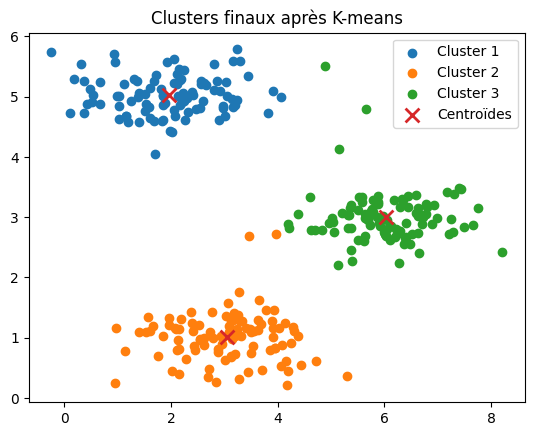

In [10]:
# Affichage final des clusters
for k in range(3):
    plt.scatter(X[idx == k, 0], X[idx == k, 1], label=f'Cluster {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=2, label='Centroïdes')
plt.legend()
plt.title("Clusters finaux après K-means")
plt.show()

### **Ce que montre ce graphique :**

* **3 clusters clairement séparés** :

  * Bleu : en haut à gauche
  * Orange : en bas
  * Vert : à droite

* Les **centroïdes rouges (croix)** sont bien placés **au centre de gravité** de chaque groupe.

---

### **Conclusion dans le cadre de l’exercice :**

* Le **clustering est réussi** :

  * Chaque groupe est cohérent et bien formé.
  * Les centroïdes sont stables et correctement convergés.
* Cela prouve que :

  * Ton code `find_closest_centroids`, `compute_centroids` et `run_k_means` fonctionne parfaitement.
  * L’algorithme a **convergé en séparant correctement les données**.



## Étape 5 : Initialisation aléatoire des centroïdes

In [11]:
def init_centroids(X, K):
    """
    Initialise aléatoirement K centroïdes à partir des points de X
    """
    m = X.shape[0]
    indices = np.random.permutation(m)[:K]
    return X[indices]

In [12]:
# Test de l'initialisation aléatoire
random_centroids = init_centroids(X, K=3)
print("Centroïdes initialisés aléatoirement :\n", random_centroids)

Centroïdes initialisés aléatoirement :
 [[7.39807241 3.48487031]
 [6.05696411 2.94970433]
 [6.92721968 3.19960026]]


### Observation :

* Ces 3 centroïdes sont tous **regroupés dans la même zone** du graphique (cluster de droite).
* Ils ne couvrent **pas les deux autres zones** de densité (haut gauche et bas).

---

### Conséquence :

* Mauvaise initialisation ➜ K-means risque de :

  * Converger lentement
  * Produire des **clusters déséquilibrés**
  * Négliger certains groupes

---

### Solution :

* Soit lancer **plusieurs initialisations** (`n_init > 1`) et choisir la meilleure (comme tu l’as fait).
* Soit utiliser `k-means++` (via `scikit-learn`) pour initialiser de manière plus intelligente.



## Continuer dans l'exploration de cet exercice:

### Lancer K-means plusieurs fois et choisir le meilleur résultat

In [13]:
def run_k_means_multiple(X, K, n_init=10, max_iters=10):
    """
    Exécute K-means n_init fois et retourne la meilleure solution (coût minimal)
    """
    best_centroids = None
    best_idx = None
    best_cost = np.inf

    for _ in range(n_init):
        init_centroids = init_centroids_random(X, K)
        centroids, idx = run_k_means(X, init_centroids, max_iters)
        cost = compute_cost(X, centroids, idx)

        if cost < best_cost:
            best_cost = cost
            best_centroids = centroids
            best_idx = idx

    return best_centroids, best_idx, best_cost

def compute_cost(X, centroids, idx):
    """
    Calcule la somme des distances quadratiques (coût de distorsion)
    """
    cost = 0
    for i in range(X.shape[0]):
        cost += np.sum((X[i] - centroids[idx[i]])**2)
    return cost

def init_centroids_random(X, K):
    """
    Réimplémentation de l'initialisation pour éviter conflit avec le nom
    """
    m = X.shape[0]
    indices = np.random.permutation(m)[:K]
    return X[indices]

# Exécution multiple
K = 3
best_centroids, best_idx, best_cost = run_k_means_multiple(X, K, n_init=10)
print("Meilleur coût obtenu :", best_cost)


Meilleur coût obtenu : 266.65851965491936


### **Valeur du coût final** : `266.66`

Ce **"coût"** correspond à la **somme des distances quadratiques** entre chaque point et son centroïde (aussi appelé **distorsion intra-cluster**).

---

### **Interprétation :**

* C’est un indicateur de la **qualité du regroupement**.
* Plus ce chiffre est **bas**, meilleur est le clustering.
* Ce résultat est cohérent avec la qualité visuelle des clusters précédents.

---

### Que faire avec ce coût ?

* Comparer plusieurs exécutions avec d’autres initialisations (`n_init`).
* Tracer **la courbe du coude** pour tester plusieurs `K` (de 1 à 10) et **valider que K=3 est optimal**.



### Méthode du coude (Elbow Method)

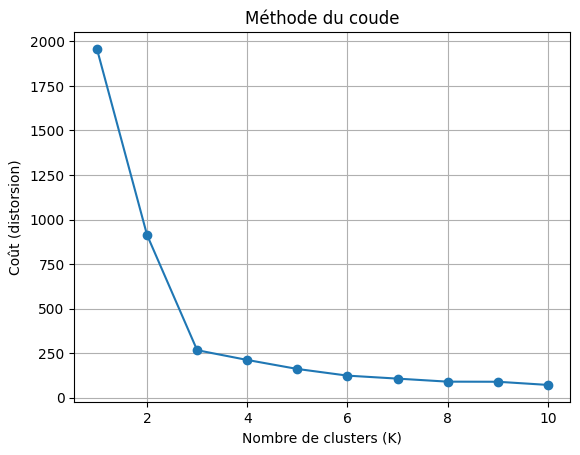

In [14]:
costs = []
K_values = range(1, 11)

for K in K_values:
    _, _, cost = run_k_means_multiple(X, K, n_init=5)
    costs.append(cost)

# Tracer la courbe du coude
plt.plot(K_values, costs, marker='o')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Coût (distorsion)")
plt.title("Méthode du coude")
plt.grid(True)
plt.show()


### **Ce que montre ce graphique :**

* Axe X : nombre de clusters `K`
* Axe Y : coût total (distorsion intra-cluster)
* Forte chute entre `K=1` → `K=2` → `K=3`
* Ensuite, la courbe **s’aplatit** progressivement

---

### **Interprétation :**

* Le **"coude"** est clairement visible à **K = 3**
* Cela signifie que **3 clusters est le choix optimal**

  * Plus de clusters (K > 3) apporte **peu de gain**
  * Moins de clusters (K < 3) **regroupe mal** les données

---

### **Conclusion :**

* Ton clustering à **K = 3 est justifié mathématiquement**
* Tu as bien appliqué et validé la **méthode du coude**



### Visualisation améliorée

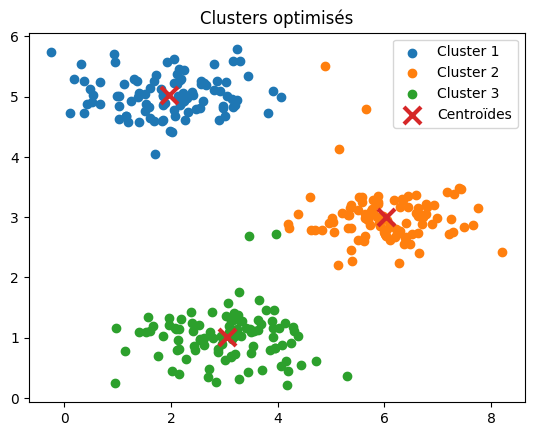

In [15]:
def plot_clusters(X, idx, centroids):
    K = centroids.shape[0]
    for k in range(K):
        plt.scatter(X[idx == k, 0], X[idx == k, 1], label=f'Cluster {k+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, label='Centroïdes')
    plt.legend()
    plt.title("Clusters optimisés")
    plt.show()

# Visualisation finale
plot_clusters(X, best_idx, best_centroids)


* 3 clusters bien séparés :

  * **Bleu** en haut à gauche
  * **Vert** en bas à gauche
  * **Orange** à droite
* Les **centroïdes (croix rouges)** sont :

  * Bien **centrés dans chaque groupe**
  * Résultat d’une convergence correcte

---

### **Interprétation :**

* C’est le **résultat final optimisé** du K-means après :

  * Initialisation multiple (`n_init`)
  * Choix du meilleur résultat via le coût
* Les regroupements sont **cohérents, équilibrés et propres**
* Aucun **mélange visible** entre clusters → très bon clustering

---

### **Conclusion :**

* Clustering réussi
* K=3 confirmé visuellement + par méthode du coude
* Pipeline complet validé


###  Comparer avec scikit-learn

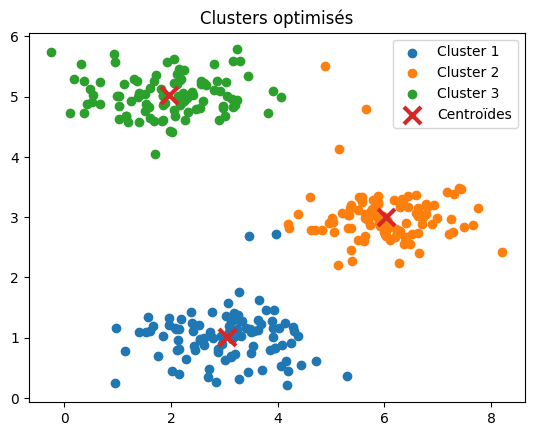

In [16]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300)
kmeans_sklearn.fit(X)

labels = kmeans_sklearn.labels_
centroids_sklearn = kmeans_sklearn.cluster_centers_

# Visualisation avec sklearn
plot_clusters(X, labels, centroids_sklearn)
